In [4]:
library(tidyverse)
ggplot2::theme_set(theme_bw())

library(showtext)
font_add("nanum", "NanumGothic.ttf")
showtext_auto()

setwd("C:/Soongsil/R/Textmining")

In [5]:
font_add_google(name = "Black Han Sans", family = "blackhansans")
showtext_auto()

Warning message in file.rename(tmp, destfile):
"cannot rename file 'C:\tmp\RtmpeQRXdf\ea8Aad44WunzF9a-dL6toA8r8nqVIXSkH-Hc.ttf.curltmp' to 'C:\tmp\RtmpeQRXdf\ea8Aad44WunzF9a-dL6toA8r8nqVIXSkH-Hc.ttf', reason '액세스가 거부되었습니다'"


### 05-01 동시 출현 단어 분석 - Co-occurrence analysis

In [6]:
raw_news_comment <- read_csv("news_comment_parasite.csv")
raw_news_comment %>% print

Rows: 4150 Columns: 5
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (4): reply, press, title, url
dttm (1): reg_time

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 4,150 x 5
   reg_time            reply                                   press title url  
   <dttm>              <chr>                                   <chr> <chr> <chr>
 1 2020-02-10 16:59:02 "정말 우리 집에 좋은 일이 생겨 기쁘고 ~ MBC   '기~  http~
 2 2020-02-10 13:32:24 "와 너무 기쁘다! 이 시국에 정말 내 일~  SBS   [영~  http~
 3 2020-02-10 12:30:09 "우리나라의 영화감독분들 그리고 앞으로~ 한겨~ ‘기~  http~
 4 2020-02-10 13:08:22 "봉준호 감독과 우리나라 대한민국 모두 ~ 한겨~ ‘기~  http~
 5 2020-02-10 16:25:41 "노벨상 탄느낌이네요\n축하축하 합니다"  한겨~ ‘기~  http~
 6 2020-02-10 12:31:45 "기생충 상 받을때 박수 쳤어요.감독상도~ 한겨~ ‘기~  http~
 7 2020-02-10 12:31:33 "대한민국 영화사를 새로 쓰고 계시네요 ~ 한겨~ ‘기~  http~
 8 2020-02-11 09:20:52 "저런게 아카데미상 받으면  '태극기 휘~  한겨~ ‘기~  http~
 9 2020-02-10 20:53:27 "다시한번 보여주세요 영화관에서 보고싶~ 한겨~ ‘기~  http~
10 2020-02-10 20:22:41 "대한민국 BTS와함께  봉준호감독님까지\~ 한겨~ ‘기~  http~
# ... with 4,140 more rows


In [8]:
library(textclean)

In [9]:
news_comment <- raw_news_comment %>%
  select(reply) %>%
  mutate(reply = str_replace_all(reply, "[^가-힣]", " "),
         reply = str_squish(reply),
         id = row_number())

In [10]:
library(tidytext)
library(KoNLP)

Checking user defined dictionary!




### ```SimplePos22()``` : 문장의 단어를 22개의 품사로 구분
<img src = "https://github.com/haven-jeon/KoNLP/raw/master/etcs/figures/konlp_tags.png">

https://github.com/haven-jeon/KoNLP/blob/master/etcs/KoNLP-API.md

In [11]:
comment_pos <- news_comment %>%
  unnest_tokens(input = reply,
                output = word,
                token = SimplePos22,
                drop = F)

comment_pos %>% 
  select(word, reply) %>% print

# A tibble: 39,956 x 2
   word          reply                                                         
   <chr>         <chr>                                                         
 1 정말/ma       정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 ~
 2 우리/np       정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 ~
 3 집/nc+에/jc   정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 ~
 4 좋/pa+은/et   정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 ~
 5 일/nc+이/jc   정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 ~
 6 생기/pv+어/ec 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 ~
 7 기쁘/pa+고/ec 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 ~
 8 행복한/nc     정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 ~
 9 것/nb+처럼/jc 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 ~
10 나/np+의/jc   정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 ~
# ... with 39,946 more rows


### ```separate_rows()``` : 문자열 분리하여 행 구성
- ```sep = "[+]"``` : 구분자, "+"가 등장할 때 마다 행을 나누어 한 행이 한 단어로 구성

In [12]:
comment_pos <- comment_pos %>%
  separate_rows(word, sep = "[+]")

comment_pos %>% 
  select(word, reply) %>% print

# A tibble: 70,553 x 2
   word    reply                                                                
   <chr>   <chr>                                                                
 1 정말/ma 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 행복~
 2 우리/np 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 행복~
 3 집/nc   정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 행복~
 4 에/jc   정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 행복~
 5 좋/pa   정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 행복~
 6 은/et   정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 행복~
 7 일/nc   정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 행복~
 8 이/jc   정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 행복~
 9 생기/pv 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 행복~
10 어/ec   정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 행복~
# ... with 70,543 more rows


### 품사 추출
#### 1. 명사 추출

In [20]:
noun <- comment_pos %>%
  filter(str_detect(word, "/n")) %>% # "/n" (명사) 추출
  mutate(word = str_remove(word, "/.*$")) # "/,*$ : "/"로 시작하는 모든 문자"

noun %>%
  select(word, reply) %>% print

# A tibble: 27,457 x 2
   word   reply                                                                
   <chr>  <chr>                                                                
 1 우리   정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 행복~
 2 집     정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 행복~
 3 일     정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 행복~
 4 행복한 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 행복~
 5 것     정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 행복~
 6 나     정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 행복~
 7 일     정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 행복~
 8 양     정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 행복~
 9 행복   정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 행복~
10 행복   정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 행복~
# ... with 27,447 more rows


In [16]:
noun %>%
  count(word, sort = T) %>% print

# A tibble: 8,069 x 2
   word         n
   <chr>    <int>
 1 영화       463
 2 기생충     445
 3 봉준호     372
 4 것         353
 5 아카데미   252
 6 축하       232
 7 나         230
 8 대한민국   226
 9 자랑       222
10 작품상     218
# ... with 8,059 more rows


#### 2. 동사, 형용사 추출

In [18]:
pvpa <- comment_pos %>%
  filter(str_detect(word, "/pv|/pa")) %>%         # "/pv", "/pa" 추출
  mutate(word = str_replace(word, "/.*$", "다"))  # "/"로 시작 문자를 "다"로 바꾸기

pvpa %>%
  select(word, reply) %>% print

# A tibble: 5,317 x 2
   word       reply                                                             
   <chr>      <chr>                                                             
 1 좋다       정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 ~ 
 2 생기다     정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 ~ 
 3 기쁘다     정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 ~ 
 4 축하드리다 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 ~ 
 5 기쁘다     정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 ~ 
 6 기쁘다     와 너무 기쁘다 이 시국에 정말 내 일같이 기쁘고 감사하다 축하드려~ 
 7 기쁘다     와 너무 기쁘다 이 시국에 정말 내 일같이 기쁘고 감사하다 축하드려~ 
 8 축하드리다 와 너무 기쁘다 이 시국에 정말 내 일같이 기쁘고 감사하다 축하드려~ 
 9 불다       우리나라의 영화감독분들 그리고 앞으로 그 꿈을 그리는 분들에게 큰 ~
10 크다       우리나라의 영화감독분들 그리고 앞으로 그 꿈을 그리는 분들에게 큰 ~
# ... with 5,307 more rows


In [21]:
pvpa %>%
  count(word, sort = T) %>% print

# A tibble: 697 x 2
   word           n
   <chr>      <int>
 1 축하드리다   298
 2 받다         215
 3 좋다         170
 4 아니다       156
 5 되다         144
 6 없다         136
 7 같다         130
 8 멋지다       121
 9 만들다       119
10 알다          94
# ... with 687 more rows


#### 3. 추출한 데이터 결합
- 두 글자 이상의 단어만 남김

In [22]:
comment <- bind_rows(noun, pvpa) %>%
  filter(str_count(word) >= 2) %>%
  arrange(id)

comment %>%
  select(word, reply) %>% print

# A tibble: 26,860 x 2
   word       reply                                                            
   <chr>      <chr>                                                            
 1 우리       정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 ~
 2 행복한     정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 ~
 3 행복       정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 ~
 4 행복       정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 ~
 5 좋다       정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 ~
 6 생기다     정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 ~
 7 기쁘다     정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 ~
 8 축하드리다 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 ~
 9 기쁘다     정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 ~
10 시국       와 너무 기쁘다 이 시국에 정말 내 일같이 기쁘고 감사하다 축하드려~
# ... with 26,850 more rows


### ```pairwise_count()``` : 단어 동시 출현 빈도 구하기 
- ```item``` : 단어
- ```feature``` : 텍스트 구분 기준
- ```sort = T``` : 빈도가 높은 순으로 출력 결과 정렬

In [25]:
library(widyr)

In [26]:
pair <- comment %>%
  pairwise_count(item = word,
                 feature = id,
                 sort = T)
pair %>% print

Warning message:
"`distinct_()` was deprecated in dplyr 0.7.0.
Please use `distinct()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated."


# A tibble: 245,920 x 3
   item1      item2      n
   <chr>      <chr>  <dbl>
 1 영화       기생충   111
 2 기생충     영화     111
 3 감독       봉준호    86
 4 봉준호     감독      86
 5 감독님     봉준호    66
 6 봉준호     감독님    66
 7 만들다     영화      57
 8 영화       만들다    57
 9 기생충     봉준호    54
10 블랙리스트 감독      54
# ... with 245,910 more rows


### 특정 단어와 자주 함꼐 사용된 단어 탐색

In [29]:
pair %>% filter(item1 == "영화") %>% print
pair %>% filter(item1 == "봉준호") %>% print

# A tibble: 2,313 x 3
   item1 item2        n
   <chr> <chr>    <dbl>
 1 영화  기생충     111
 2 영화  만들다      57
 3 영화  봉준호      52
 4 영화  받다        48
 5 영화  한국        46
 6 영화  아카데미    42
 7 영화  같다        41
 8 영화  감독        39
 9 영화  아니다      38
10 영화  좋다        35
# ... with 2,303 more rows
# A tibble: 1,579 x 3
   item1  item2          n
   <chr>  <chr>      <dbl>
 1 봉준호 감독          86
 2 봉준호 감독님        66
 3 봉준호 기생충        54
 4 봉준호 영화          52
 5 봉준호 블랙리스트    48
 6 봉준호 대한민국      38
 7 봉준호 자랑          33
 8 봉준호 축하드리다    30
 9 봉준호 송강호        30
10 봉준호 축하          25
# ... with 1,569 more rows


### 05-02 동시 출현 네트워크 - Co-occurrence network

### ```as_tbl_graph()``` : 네트워크 그래프 데이터 생성
- ```directed = F``` : 방향성 없음

In [31]:
library(tidygraph)

In [34]:
graph_comment <- pair %>%
    filter(n >= 25) %>%
    as_tbl_graph()

graph_comment %>% print

# A tbl_graph: 30 nodes and 108 edges
#
# A directed simple graph with 2 components
#
# Node Data: 30 x 1 (active)
  name  
  <chr> 
1 영화  
2 기생충
3 감독  
4 봉준호
5 감독님
6 만들다
# ... with 24 more rows
#
# Edge Data: 108 x 3
   from    to     n
  <int> <int> <dbl>
1     1     2   111
2     2     1   111
3     3     4    86
# ... with 105 more rows


노드 30개, 엣지(선) 108개

### ```ggraph()``` : 네트워크 그래프 생성
- ```layout``` : 네트워크 형태를 정함
- 네트워크 그래프 데이터 대입

### ```geom_edge_link()``` : 단어를 엣지로 연결
### ```geom_node_point()``` : 단어를 노드로 구성
### ```geom_node_text()```
- ```aes(label = name)``` : 노드에 단어를 표시


https://www.data-imaginist.com/2017/ggraph-introduction-layouts

In [38]:
library(ggraph)

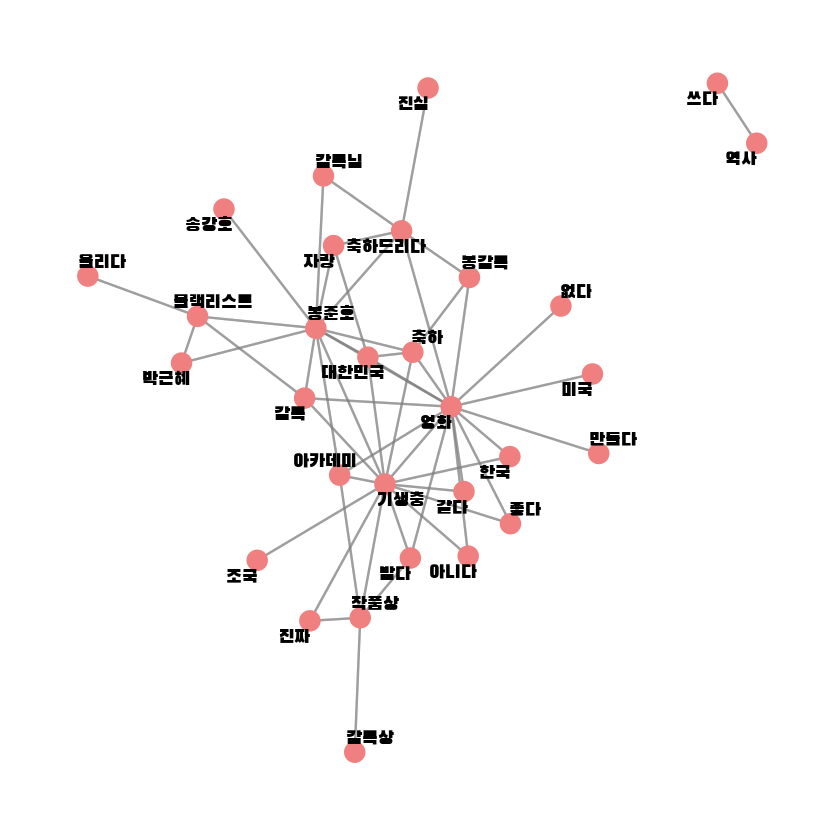

In [40]:
set.seed(1234)                              # 난수 고정
ggraph(graph_comment, layout = "fr") +      # 레이아웃
  
  geom_edge_link(color = "gray50",          # 엣지 색깔
                 alpha = 0.5) +             # 엣지 명암

  geom_node_point(color = "lightcoral",     # 노드 색깔
                  size = 5) +               # 노드 크기

  geom_node_text(aes(label = name),         # 텍스트 표시
                 repel = T,                 # 노드밖 표시
                 size = 5,                  # 텍스트 크기
                 family = "blackhansans") +  # 폰트

  theme_graph()                             # 배경 삭제

### 네트워크 그래프 함수 

In [41]:
word_network <- function(x) {
  ggraph(x, layout = "fr") +
    geom_edge_link(color = "gray50",
                   alpha = 0.5) +
    geom_node_point(color = "lightcoral",
                    size = 5) +
    geom_node_text(aes(label = name),
                   repel = T,
                   size = 5,
                   family = "blackhansans") +
    theme_graph()
}

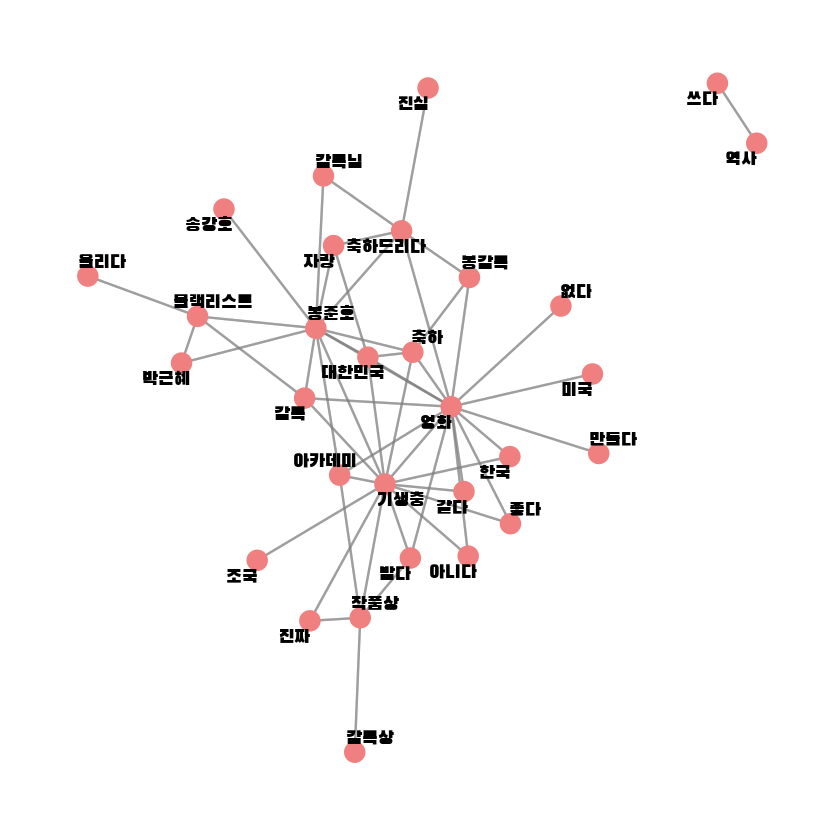

In [42]:
set.seed(1234)
word_network(graph_comment)

### 유의어 처리
- 유의어 : 표현은 다르지만 의미가 비슷한 단어 ("감독", "봉감독", "봉준호감독")

In [44]:
# 유의어 처리하기
comment <- comment %>%
  mutate(word = ifelse(str_detect(word, "감독") &
                      !str_detect(word, "감독상"), "봉준호", word), 
         word = ifelse(word == "오르다", "올리다", word),
         word = ifelse(str_detect(word, "축하"), "축하", word))

In [45]:
# 단어 동시 출현 빈도 구하기
pair <- comment %>%
  pairwise_count(item = word,
                 feature = id,
                 sort = T)

In [46]:
# 네트워크 그래프 데이터 만들기
graph_comment <- pair %>%
  filter(n >= 25) %>%
  as_tbl_graph()

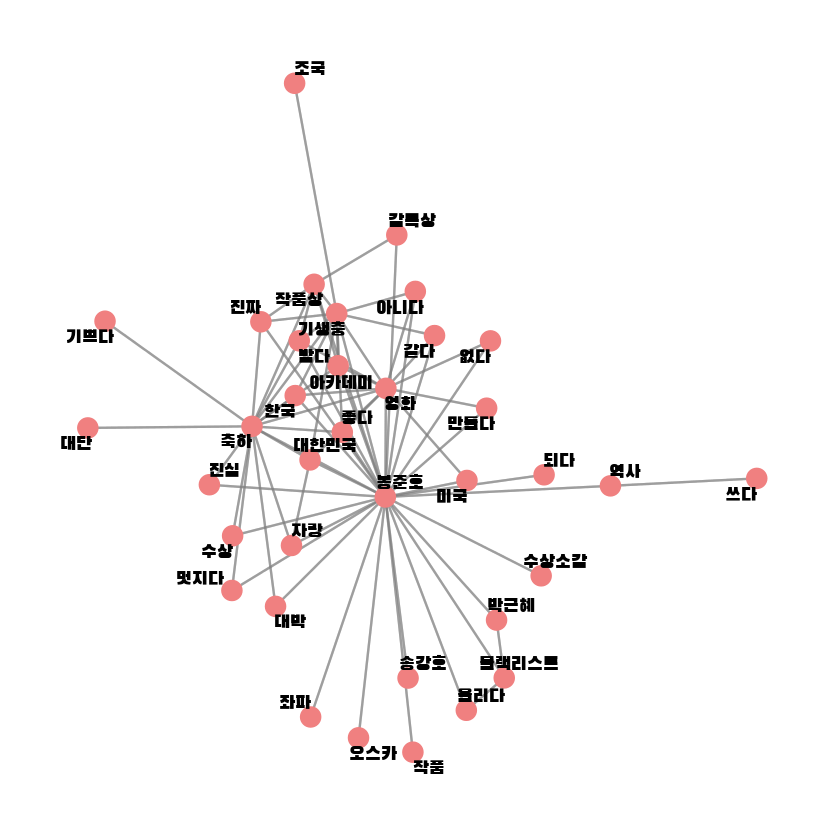

In [47]:
# 네트워크 그래프 만들기
set.seed(1234)
word_network(graph_comment)

### 1. 연결 중심성 : 한 점에 직접적으로 연결된 점들의 합 (연결된 노드가 많을수록 증가)
- ```centrality_degree()```

### 2. 근접 중심성 : 한 노드로부터 다른 노드에 도달하기까지 필요한 최소 단계의 합 (높을수록 중앙에 위치)
- ```centrality_closeness()```

### 3. 매게 중심성 : 노드간의 연결 경로에 위치할수록 높음
- ```centrality_betweenness()```

### 4. 위세 중심성 : 자신의 연결정도 중심성으로부터 발생하는 영향력과 자신과 연결된 타인의 영향력을 합하여 결정, 연결된 노드가 위세가 높을 경우 자신의 위세도 높아짐 [보나시치 권력지수 : 연결된 노드의 중요성에 가중치]
- ```centrality_eigen()```

### 5. 페이지랭크 : 상대적 중요도에 따라 가중치 부여


https://tidygraph.data-imaginist.com/

### group_infomap() : 커뮤니티 탐색, 커뮤니티를 정수형 숫자로 표현
### 커뮤니티 : 단어 간의 관계가 가까워 빈번하게 연결된 노드 집단
- 노드를 커뮤니티별로 구분지어 서로 다른 색으로 표현

In [76]:
set.seed(1234)
graph_comment1 <- pair %>%
  filter(n >= 25) %>%
  as_tbl_graph(directed = F) %>%
  mutate(centrality = centrality_degree(),        # 연결 중심성
         group = as.factor(group_infomap()))      # 커뮤니티

graph_comment1 %>% print

# A tbl_graph: 36 nodes and 152 edges
#
# An undirected multigraph with 1 component
#
# Node Data: 36 x 3 (active)
  name       centrality group
  <chr>           <dbl> <fct>
1 봉준호             62 4    
2 축하               34 2    
3 영화               26 3    
4 블랙리스트          6 6    
5 기생충             26 1    
6 대한민국           10 3    
# ... with 30 more rows
#
# Edge Data: 152 x 3
   from    to     n
  <int> <int> <dbl>
1     1     2   198
2     1     2   198
3     1     3   119
# ... with 149 more rows


In [53]:
library(igraph)

In [77]:
set.seed(1234)
graph_comment2 <- pair %>%
  filter(n >= 25) %>%
  as_tbl_graph(directed = F) %>%
  mutate(centrality = centrality_eigen(),        #  위세 중심성
         group = as.factor(group_infomap()))      # 커뮤니티

In [78]:
set.seed(1234)
graph_comment3 <- pair %>%
  filter(n >= 25) %>%
  as_tbl_graph(directed = F) %>%
  mutate(centrality = centrality_closeness(),        #  근접 중심성
         group = as.factor(group_infomap()))      # 커뮤니티

In [79]:
set.seed(1234)
graph_comment4 <- pair %>%
  filter(n >= 25) %>%
  as_tbl_graph(directed = F) %>%
  mutate(centrality = centrality_betweenness(),    #  매게 중심성
         group = as.factor(group_infomap()))      # 커뮤니티

Warning message in betweenness(graph = graph, v = V(graph), directed = directed, :
"'nobigint' is deprecated since igraph 1.3 and will be removed in igraph 1.4"


In [80]:
set.seed(1234)
graph_comment5 <- pair %>%
  filter(n >= 25) %>%
  as_tbl_graph(directed = F) %>%
  mutate(centrality = centrality_pagerank(),    #  페이지 랭크
         group = as.factor(group_infomap()))      # 커뮤니티

In [84]:
set.seed(1234)
g1 <- ggraph(graph_comment1, layout = "fr") +      # 레이아웃
  
  geom_edge_link(color = "gray50",          # 엣지 색깔
                 alpha = 0.5) +             # 엣지 명암
  
  geom_node_point(aes(size = centrality,    # 노드 크기
                      color = group),       # 노드 색깔
                  show.legend = F) +        # 범례 삭제
  scale_size(range = c(5, 15)) +            # 노드 크기 범위
  
  geom_node_text(aes(label = name),         # 텍스트 표시
                 repel = T,                 # 노드밖 표시
                 size = 5,                  # 텍스트 크기
                 family = "blackhansans") +  # 폰트
  
  theme_graph()

g2 <- ggraph(graph_comment2, layout = "fr") +      # 레이아웃
  
  geom_edge_link(color = "gray50",          # 엣지 색깔
                 alpha = 0.5) +             # 엣지 명암
  
  geom_node_point(aes(size = centrality,    # 노드 크기
                      color = group),       # 노드 색깔
                  show.legend = F) +        # 범례 삭제
  scale_size(range = c(5, 15)) +            # 노드 크기 범위
  
  geom_node_text(aes(label = name),         # 텍스트 표시
                 repel = T,                 # 노드밖 표시
                 size = 5,                  # 텍스트 크기
                 family = "blackhansans") +  # 폰트
  
  theme_graph() 

g3 <- ggraph(graph_comment3, layout = "fr") +      # 레이아웃
  
  geom_edge_link(color = "gray50",          # 엣지 색깔
                 alpha = 0.5) +             # 엣지 명암
  
  geom_node_point(aes(size = centrality,    # 노드 크기
                      color = group),       # 노드 색깔
                  show.legend = F) +        # 범례 삭제
  scale_size(range = c(5, 15)) +            # 노드 크기 범위
  
  geom_node_text(aes(label = name),         # 텍스트 표시
                 repel = T,                 # 노드밖 표시
                 size = 5,                  # 텍스트 크기
                 family = "blackhansans") +  # 폰트
  
  theme_graph()

g4 <- ggraph(graph_comment4, layout = "fr") +      # 레이아웃
  
  geom_edge_link(color = "gray50",          # 엣지 색깔
                 alpha = 0.5) +             # 엣지 명암
  
  geom_node_point(aes(size = centrality,    # 노드 크기
                      color = group),       # 노드 색깔
                  show.legend = F) +        # 범례 삭제
  scale_size(range = c(5, 15)) +            # 노드 크기 범위
  
  geom_node_text(aes(label = name),         # 텍스트 표시
                 repel = T,                 # 노드밖 표시
                 size = 5,                  # 텍스트 크기
                 family = "blackhansans") +  # 폰트
  
  theme_graph()

g5 <- ggraph(graph_comment5, layout = "fr") +      # 레이아웃
  
  geom_edge_link(color = "gray50",          # 엣지 색깔
                 alpha = 0.5) +             # 엣지 명암
  
  geom_node_point(aes(size = centrality,    # 노드 크기
                      color = group),       # 노드 색깔
                  show.legend = F) +        # 범례 삭제
  scale_size(range = c(5, 15)) +            # 노드 크기 범위
  
  geom_node_text(aes(label = name),         # 텍스트 표시
                 repel = T,                 # 노드밖 표시
                 size = 5,                  # 텍스트 크기
                 family = "blackhansans") +  # 폰트
  
  theme_graph()

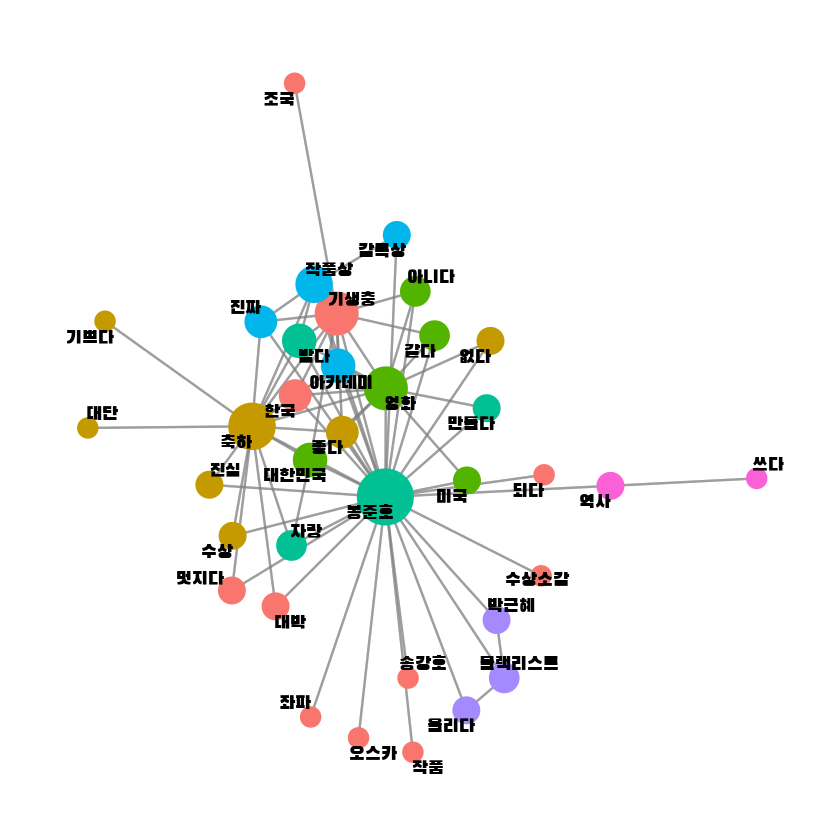

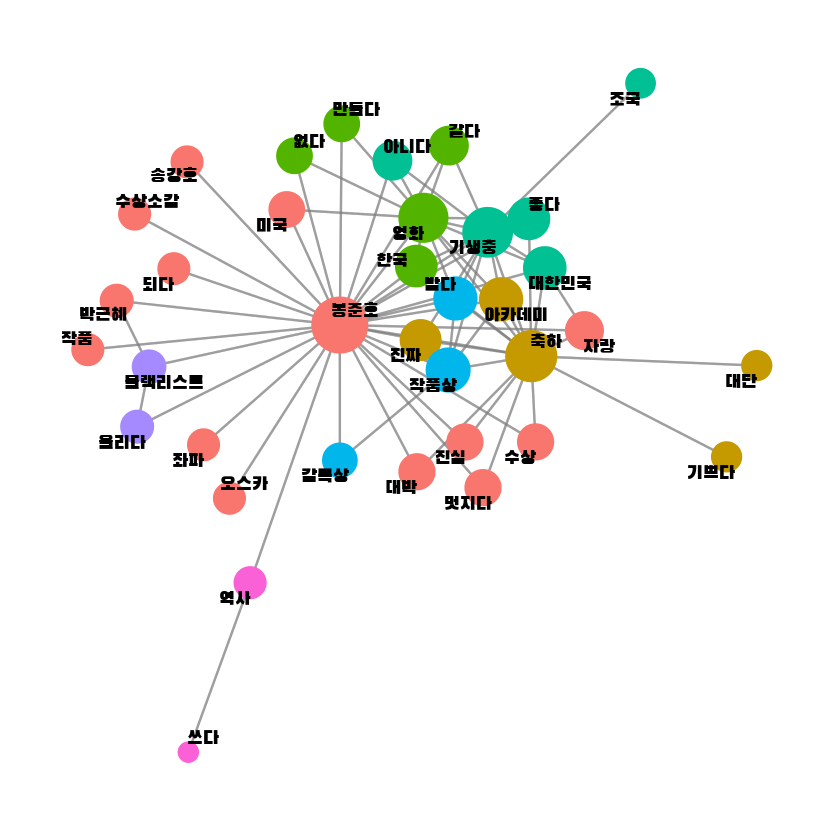

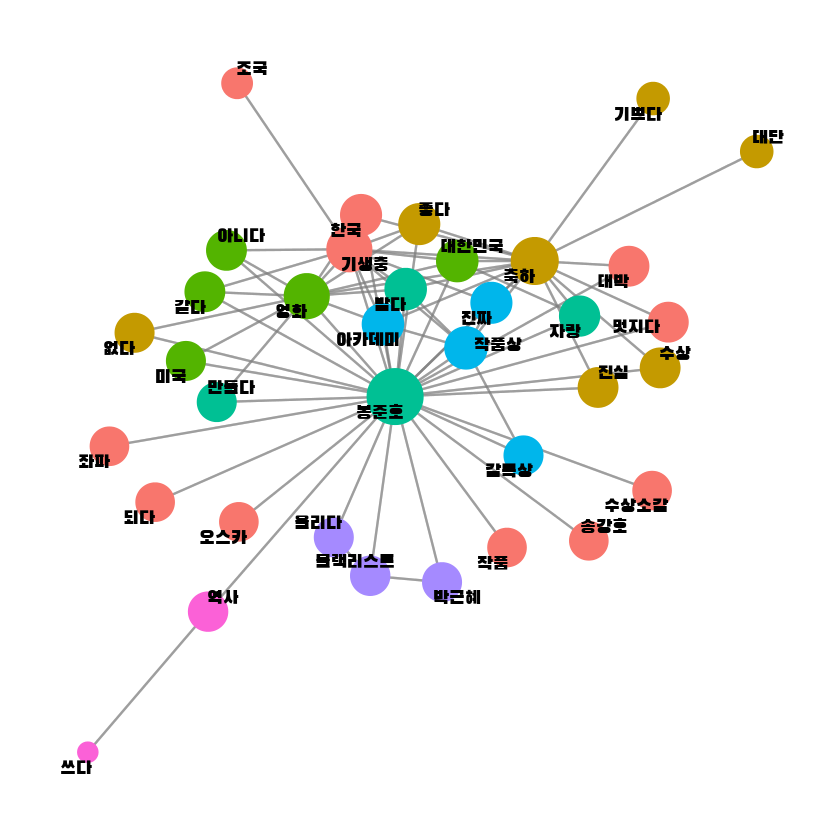

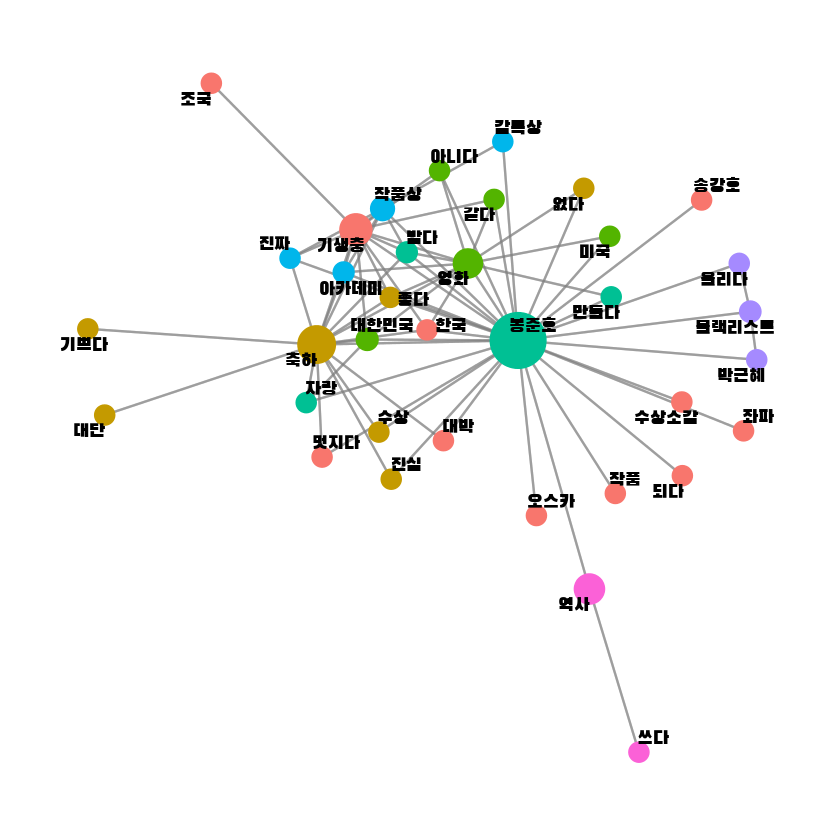

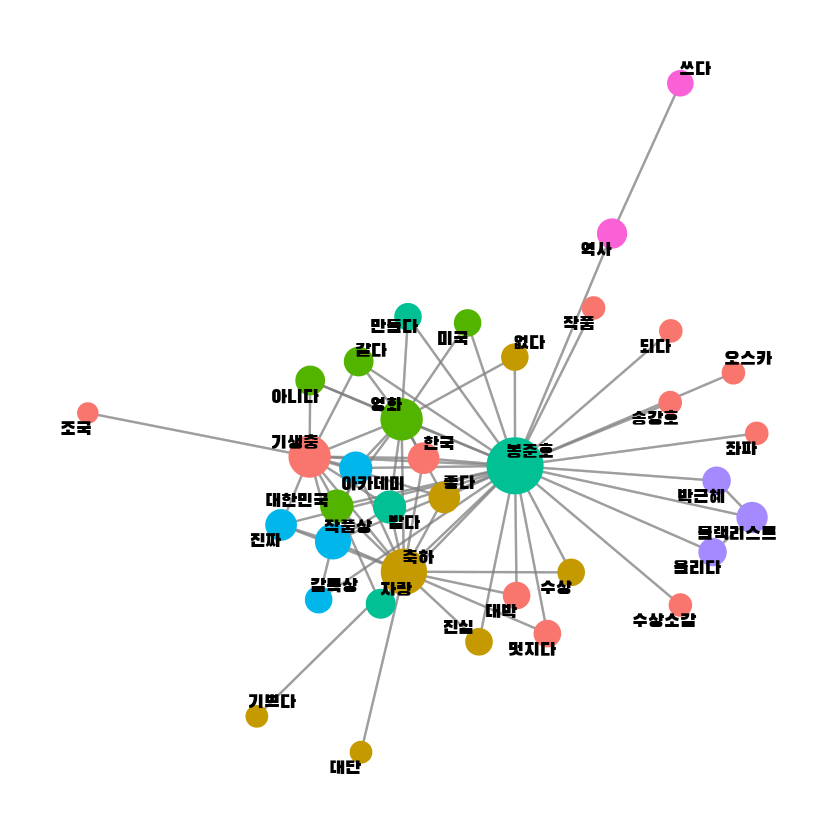

In [94]:
g1 ; g2 ; g3; g4; g5

### 네트워크 주요 단어 탐색

In [96]:
graph_comment1 %>%
    filter(name == "봉준호")

# A tbl_graph: 1 nodes and 0 edges
#
# An unrooted tree
#
# Node Data: 1 x 3 (active)
  name   centrality group
  <chr>       <dbl> <fct>
1 봉준호         62 4    
#
# Edge Data: 0 x 3
# ... with 3 variables: from <int>, to <int>, n <dbl>

### 같은 커뮤니티로 분류된 단어 탐색

In [102]:
graph_comment1 %>%
    filter(group == 4) %>%
    arrange(-centrality) %>%
    data.frame() %>% print

    name centrality group
1 봉준호         62     4
2   받다         10     4
3   자랑          6     4
4 만들다          4     4


### 중심성이 높은 주요 단어 탐색

In [101]:
graph_comment1 %>%
    filter(group == 2) %>%
    arrange(-centrality) %>%
    data.frame() %>% print

    name centrality group
1   축하         34     2
2   좋다          8     2
3   진심          4     2
4   수상          4     2
5   없다          4     2
6   대단          2     2
7 기쁘다          2     2


### 주요 단어가 사용된 원문 탐색

In [106]:
news_comment %>%
  filter(str_detect(reply, "봉준호") & str_detect(reply, "대박")) %>%
  select(reply) %>% head %>% print

# A tibble: 6 x 1
  reply                                                                      
  <chr>                                                                      
1 대박 대박 진짜 대박 봉준호 감독님과 우리 배우들 너무 다랑스러워요          
2 내가 죽기전에 아카데미에서 한국어를 들을줄이야 봉준호대박 기생충대박       
3 대박 관왕이라니 축하합니다 봉준호를 배출한 충무로 그리고 문화강국 대한 민국
4 우와 대박 진자 대단하다 봉준호                                             
5 봉준호 경사났네 대박중에 대에박 축하합니다                                 
6 봉준호 작품상 탔다 대박                                                    


In [107]:
news_comment %>%
  filter(str_detect(reply, "박근혜") & str_detect(reply, "블랙리스트")) %>%
  select(reply) %>% head %>% print

# A tibble: 6 x 1
  reply                                                                         
  <chr>                                                                         
1 일베와 자한당이 싫어하는 봉준호 감독이 아카데미에서 상받으니 쪽바리들처럼 엄~ 
2 박근혜 블랙리스트 로 낙인찍은 봉준호 감독님이 아시아 최초로 오스카에서 상을 ~ 
3 우리나라에서만 좌파다 빨갱이다 라고 비하함 박근혜 때 이런 세계적 감독을 블랙~ 
4 박근혜 최순실 블랙리스트에 오른 훌륭하신 감독님 축하합니다                    
5 박근혜정부가 얼마나 썩고 무능했냐면 각종 영화제에서 최고상 수상을 받는 유능한~
6 넷상 보수들 만큼 이중적인 새 끼들 없음 봉준호 송강호 보고 종북좌빨 홍어드립 ~ 


In [108]:
news_comment %>%
  filter(str_detect(reply, "기생충") & str_detect(reply, "조국")) %>%
  select(reply) %>% head %>% print

# A tibble: 6 x 1
  reply                                                                        
  <chr>                                                                        
1 조국이가 받아야 한다 기생충 스토리 제공                                      
2 한번도경험하지 못한 조국가족사기단기생충 개봉박두                            
3 와 조국 가족 사기단 부제 기생충 최고                                         
4 문재인과 조국 기생충 리얼                                                    
5 기생충은 좌좀 조국 가족을 패러디한 영화라서 우파들도 열광하고 있는 것이다 같~
6 조국 가족이 기생충 영화를 꼭 봐야되는데                                      


### 05-03 단어 간 상관 분석 - Phi coefficient
- 다른 단어에 비해 상대적으로 자주 함꼐 사용된 단어가 무엇인지 탐색

### 파이 계수 (phi coefficient) : 두 단어가 함꼐 사용되는 경우가 각각 사용되는 경우에 비해 얼마나 많은지 나타낸 지표
- 어떤 단어와 자주 함꼐 사용되지만 다른 단어와는 자주 함께 사용되지 않는 단어, 즉 상대적으로 관련성이 큰 단어가 무엇인지 알 수 있음

### 파이 계수의 의미 
- X, Y 모두 있음(a)
- X만 있음 (b)
- Y만 있음 (c)
- X, Y 모두 없음(d)


| | **단어 Y 잇음** | **단어 Y 없음** | **전체** |
| -- | -- | -- | -- |
| **단어 X 있음** | a | b | a + b |
| **단어 X 없음** | c | d | c + d |
| **전체** | a + c | b + d| |

$$
\phi = { {ad - bc} \over {\sqrt{(a + b)(c + d)(a + c)(b + d)}} }
$$
- 범위 -1 ~ +1
- +1에 가까울수록 두 단어가 자주 함께 사용되어 관련성이 큼
- -1에 가까울수록 함께 사용되는 경우가 드물어 관련성이 적음

### ```widyr::pairwide_cor()``` : 파이 계수 구하기
- ```item``` : 단어
- ```feature``` : 텍스트 구분 기준
- ```sort = T``` : 파이 계수가 높은 순으로 정렬

In [109]:
word_cors <- comment %>%
  add_count(word) %>%
  filter(n >= 20) %>%
  pairwise_cor(item = word,
               feature = id,
               sort = T)

word_cors %>% print

# A tibble: 26,732 x 3
   item1      item2      correlation
   <chr>      <chr>            <dbl>
 1 올리다     블랙리스트       0.478
 2 블랙리스트 올리다           0.478
 3 역사       쓰다             0.370
 4 쓰다       역사             0.370
 5 박근혜     블랙리스트       0.322
 6 블랙리스트 박근혜           0.322
 7 가족       조국             0.306
 8 조국       가족             0.306
 9 작품상     감독상           0.276
10 감독상     작품상           0.276
# ... with 26,722 more rows


### 특정 단어와 관련성이 큰 단어 탐색

In [113]:
word_cors %>% 
  filter(item1 == "대한민국") %>% print

# A tibble: 163 x 3
   item1    item2  correlation
   <chr>    <chr>        <dbl>
 1 대한민국 국민        0.182 
 2 대한민국 자랑        0.158 
 3 대한민국 위상        0.149 
 4 대한민국 국격        0.129 
 5 대한민국 위대한      0.100 
 6 대한민국 세계        0.0910
 7 대한민국 문화        0.0757
 8 대한민국 감사합      0.0724
 9 대한민국 나라        0.0715
10 대한민국 오늘        0.0715
# ... with 153 more rows


### 파이 계수 그래프

In [114]:
# 관심 단어 목록 생성
target <- c("대한민국", "역사", "수상소감", "조국", "박근혜", "블랙리스트")

In [116]:
top_cors <- word_cors %>%
  filter(item1 %in% target) %>%
  group_by(item1) %>%
  slice_max(correlation, n = 8)

In [117]:
top_cors$item1 <- factor(top_cors$item1, levels = target)

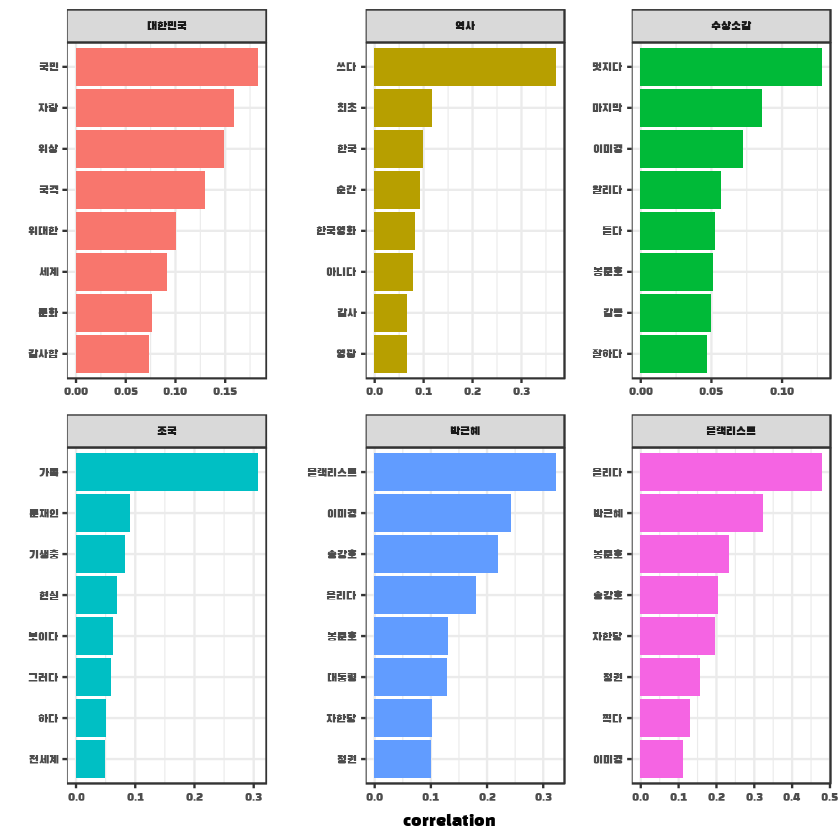

In [118]:
ggplot(top_cors, aes(x = reorder_within(item2, correlation, item1),
                 y = correlation,
                 fill = item1)) +
  geom_col(show.legend = F) +
  facet_wrap(~ item1, scales = "free") +
  coord_flip() +
  scale_x_reordered() +
  labs(x = NULL) +
  theme(text = element_text(family = "blackhansans"))

### 파이 계수 네트워크 그래프
- 다른 단어에 비해 상대적으로 자주 함께 사용된 단어쌍 중심으로 네트워크 형성

In [120]:
set.seed(1234)
graph_cors <- word_cors %>%
  filter(correlation >= 0.15) %>%
  as_tbl_graph(directed = F) %>%
  mutate(centrality = centrality_degree(),
         group = as.factor(group_infomap()))

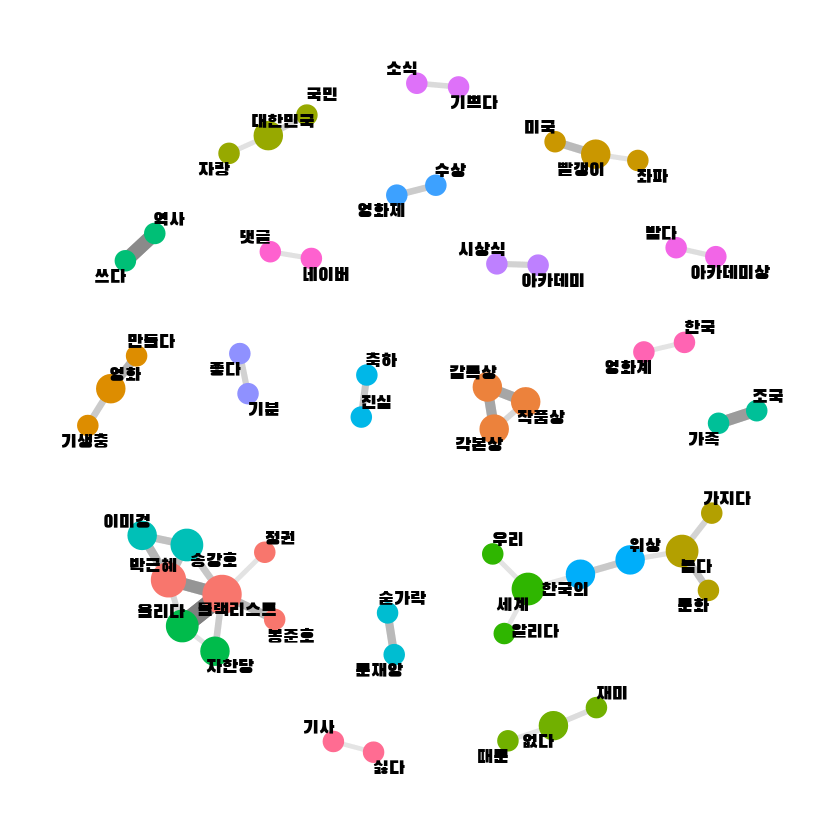

In [121]:
set.seed(1234)
ggraph(graph_cors, layout = "fr") +

  geom_edge_link(color = "gray50",
                 aes(edge_alpha = correlation,   # 엣지 명암
                     edge_width = correlation),  # 엣지 두께
                 show.legend = F) +              # 범례 삭제
  scale_edge_width(range = c(1, 4)) +            # 엣지 두께 범위
  
  geom_node_point(aes(size = centrality,
                      color = group),
                  show.legend = F) +
  scale_size(range = c(5, 10)) +

  geom_node_text(aes(label = name),
                 repel = T,
                 size = 5,
                 family = "blackhansans") +

  theme_graph()

### 05-04 연이어 사용된 단어쌍 분석 - n-gram

### n- gram : 연이어 사용된 n개의 단어
- **unigram(1-gram, 단어 기준 토큰화), bigram(2-gram), trigram(3-gram)**
- 텍스트를 n-gram으로 토큰화해 분석시 단어가 연결될 때 생기는 의미와 맥락을 이해
- 단어가 얼마나 자주 함꼐 사용되었는지가 아니라, **얼마나 자주 연이어 사용되었는지**를 중심으로 분석

### ```unnest_tokens()``` 
- ```tokens``` : "ngrams"
- ```n```

In [122]:
text <- tibble(value = "대한민국은 민주공화국이다. 대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.")

In [124]:
text %>%
  unnest_tokens(input = value,
                output = word,
                token = "ngrams",
                n = 2) %>% print

# A tibble: 9 x 1
  word                     
  <chr>                    
1 대한민국은 민주공화국이다
2 민주공화국이다 대한민국의
3 대한민국의 주권은        
4 주권은 국민에게          
5 국민에게 있고            
6 있고 모든                
7 모든 권력은              
8 권력은 국민으로부터      
9 국민으로부터 나온다      


In [126]:
comment_pos %>% print

# A tibble: 70,553 x 3
   reply                                                                id word 
   <chr>                                                             <int> <chr>
 1 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 ~     1 정말~
 2 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 ~     1 우리~
 3 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 ~     1 집/nc
 4 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 ~     1 에/jc
 5 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 ~     1 좋/pa
 6 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 ~     1 은/et
 7 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 ~     1 일/nc
 8 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 ~     1 이/jc
 9 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 ~     1 생기~
10 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 ~     1 어/ec
# ... with 70,543 more rows


**명사, 동사, 형용사 추출**

In [129]:
comment_new <- comment_pos %>%
  separate_rows(word, sep = "[+]") %>%
  filter(str_detect(word, "/n|/pv|/pa")) %>%
  mutate(word = ifelse(str_detect(word, "/pv|/pa"),
                       str_replace(word, "/.*$", "다"),
                       str_remove(word, "/.*$"))) %>%
  filter(str_count(word) >= 2) %>%
  arrange(id)

comment_new %>% print

# A tibble: 26,860 x 3
   reply                                                                id word 
   <chr>                                                             <int> <chr>
 1 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 ~     1 우리 
 2 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 ~     1 좋다 
 3 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 ~     1 생기~
 4 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 ~     1 기쁘~
 5 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 ~     1 행복~
 6 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 ~     1 행복 
 7 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 ~     1 축하~
 8 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 ~     1 행복 
 9 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼 나의 일인 양 ~     1 기쁘~
10 와 너무 기쁘다 이 시국에 정말 내 일같이 기쁘고 감사하다 축하드려~     2 기쁘~
# ... with 26,850 more rows


**유의어 처리**

In [130]:
comment_new <- comment_new %>%
  mutate(word = ifelse(str_detect(word, "감독") &
                      !str_detect(word, "감독상"), "봉준호", word), 
         word = ifelse(word  == "오르다", "올리다", word),
         word = ifelse(str_detect(word, "축하"), "축하", word))

comment_new %>%
  select(word) %>% print

# A tibble: 26,860 x 1
   word  
   <chr> 
 1 우리  
 2 좋다  
 3 생기다
 4 기쁘다
 5 행복한
 6 행복  
 7 축하  
 8 행복  
 9 기쁘다
10 기쁘다
# ... with 26,850 more rows


**한 댓글이 하나의 행이 되도록 결합**

In [131]:
line_comment <- comment_new %>%
  group_by(id) %>%
  summarise(sentence = paste(word, collapse = " "))

line_comment %>% print

# A tibble: 4,007 x 2
      id sentence                                                               
   <int> <chr>                                                                  
 1     1 우리 좋다 생기다 기쁘다 행복한 행복 축하 행복 기쁘다                   
 2     2 기쁘다 시국 기쁘다 감사하다 축하 진심                                  
 3     3 우리나라 봉준호 불다 크다 영감 봉준호 공동각본쓴 한진 작가님 축하 축하~
 4     4 봉준호 봉준호 우리나라 대한민국 자랑 세계 어디 우리 한국인 힘내다 삽시 
 5     5 노벨상 탄느낌이네요 축하                                               
 6     6 기생충 받다 박수 치다 감독상 기대다 봉준호 봉준호                      
 7     7 대한민국 영화사 쓰다 계시다                                            
 8     8 아카데미상 받다 태극기 휘날리다 광해 명량 전부문 휩쓸어야겠            
 9     9 다시한번 보이다 영화관                                                 
10    10 대한민국 봉준호 대단 한국의 문화 자긍심 가지                           
# ... with 3,997 more rows


**바이그램**

In [132]:
bigram_comment <- line_comment %>%
  unnest_tokens(input = sentence,
                output = bigram,
                token = "ngrams",
                n = 2)

bigram_comment %>% print

# A tibble: 23,348 x 2
      id bigram       
   <int> <chr>        
 1     1 우리 좋다    
 2     1 좋다 생기다  
 3     1 생기다 기쁘다
 4     1 기쁘다 행복한
 5     1 행복한 행복  
 6     1 행복 축하    
 7     1 축하 행복    
 8     1 행복 기쁘다  
 9     2 기쁘다 시국  
10     2 시국 기쁘다  
# ... with 23,338 more rows


### 연이어 사용된 단어쌍 빈도 구하기

#### 1. 바이그램 분리하기
### ```tidyr::separate()``` : n-gram을 구성하는 두 단어를 분리

In [133]:
bigram_seprated <- bigram_comment %>%
  separate(bigram, c("word1", "word2"), sep = " ")

bigram_seprated %>% print

# A tibble: 23,348 x 3
      id word1  word2 
   <int> <chr>  <chr> 
 1     1 우리   좋다  
 2     1 좋다   생기다
 3     1 생기다 기쁘다
 4     1 기쁘다 행복한
 5     1 행복한 행복  
 6     1 행복   축하  
 7     1 축하   행복  
 8     1 행복   기쁘다
 9     2 기쁘다 시국  
10     2 시국   기쁘다
# ... with 23,338 more rows


#### 2. 단어상 빈도 구하기

In [135]:
pair_bigram <- bigram_seprated %>%
  count(word1, word2, sort = T) %>%
  na.omit()

pair_bigram %>% print

# A tibble: 19,030 x 3
   word1      word2          n
   <chr>      <chr>      <int>
 1 봉준호     봉준호       155
 2 블랙리스트 올리다        64
 3 진심       축하          64
 4 봉준호     축하          57
 5 봉준호     송강호        34
 6 영화       만들다        31
 7 축하       봉준호        31
 8 대단       축하          27
 9 봉준호     블랙리스트    27
10 대박       축하          26
# ... with 19,020 more rows


In [136]:
# 동시 출현 단어쌍
pair %>%
  filter(item1 == "대한민국") %>% print

# 바이그램 단어쌍
pair_bigram %>%
  filter(word1 == "대한민국") %>% print

# A tibble: 1,010 x 3
   item1    item2        n
   <chr>    <chr>    <dbl>
 1 대한민국 봉준호      70
 2 대한민국 축하        54
 3 대한민국 자랑        44
 4 대한민국 영화        30
 5 대한민국 기생충      27
 6 대한민국 국민        22
 7 대한민국 세계        16
 8 대한민국 아카데미    16
 9 대한민국 위상        15
10 대한민국 좋다        14
# ... with 1,000 more rows
# A tibble: 109 x 3
   word1    word2      n
   <chr>    <chr>  <int>
 1 대한민국 국민      21
 2 대한민국 자랑      15
 3 대한민국 영화      11
 4 대한민국 국격       8
 5 대한민국 위상       7
 6 대한민국 만세       6
 7 대한민국 봉준호     5
 8 대한민국 문화       4
 9 대한민국 영광       4
10 대한민국 기생충     3
# ... with 99 more rows


### n-gram 네트워크 그래프

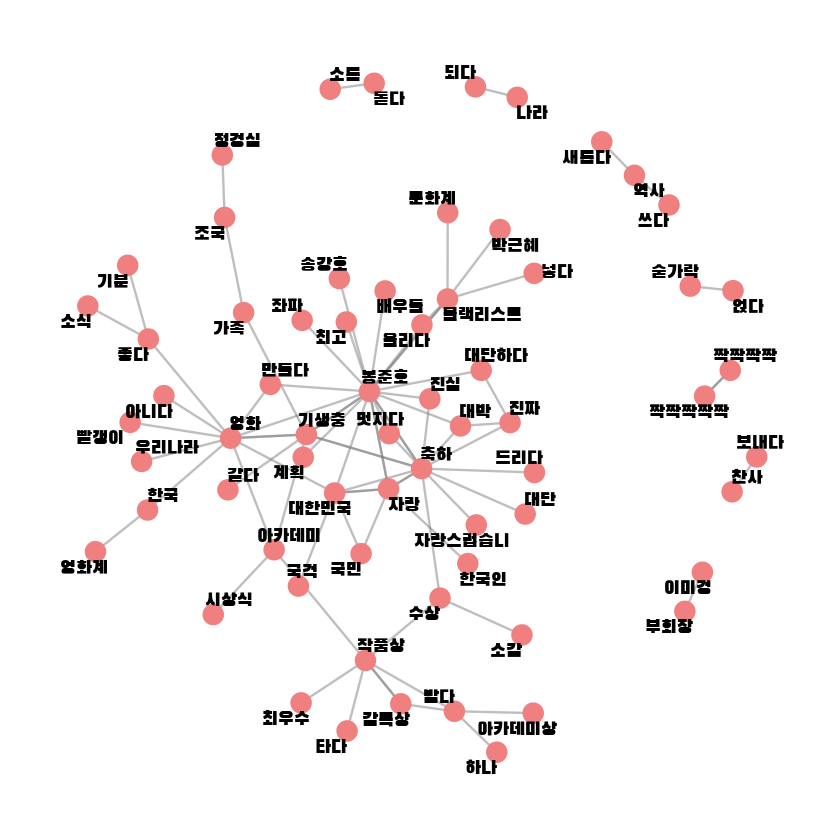

In [137]:
graph_bigram <- pair_bigram %>%
  filter(n >= 8) %>%
  as_tbl_graph()

set.seed(1234)
word_network(graph_bigram)

#### 유의어 통일

In [141]:
bigram_seprated <- bigram_seprated %>%
  mutate(word1 = ifelse(str_detect(word1, "대단"), "대단", word1),
         word2 = ifelse(str_detect(word2, "대단"), "대단", word2),

         word1 = ifelse(str_detect(word1, "자랑"), "자랑", word1),
         word2 = ifelse(str_detect(word2, "자랑"), "자랑", word2),

         word1 = ifelse(str_detect(word1, "짝짝짝"), "짝짝짝", word1),
         word2 = ifelse(str_detect(word2, "짝짝짝"), "짝짝짝", word2)) %>%

  filter(word1 != word2)   # 같은 단어 연속 제거

pair_bigram <- bigram_seprated %>%
  count(word1, word2, sort = T) %>%
  na.omit()

pair_bigram %>% print

# A tibble: 18,836 x 3
   word1      word2          n
   <chr>      <chr>      <int>
 1 블랙리스트 올리다        64
 2 진심       축하          64
 3 봉준호     축하          57
 4 대단       축하          42
 5 봉준호     송강호        34
 6 영화       만들다        31
 7 축하       봉준호        31
 8 축하       자랑          28
 9 봉준호     블랙리스트    27
10 대박       축하          26
# ... with 18,826 more rows


In [142]:
bigram_seprated_new <- bigram_seprated %>%
  mutate_at(vars("word1", "word2"),
            ~ case_when(
              str_detect(., "대단") ~ "대단",
              str_detect(., "자랑") ~ "자랑",
              str_detect(., "짝짝짝") ~ "짝짝짝",
              T ~ .))

pair_bigram <- bigram_seprated_new %>%
  count(word1, word2, sort = T) %>%
  na.omit()

pair_bigram %>% print

# A tibble: 18,836 x 3
   word1      word2          n
   <chr>      <chr>      <int>
 1 블랙리스트 올리다        64
 2 진심       축하          64
 3 봉준호     축하          57
 4 대단       축하          42
 5 봉준호     송강호        34
 6 영화       만들다        31
 7 축하       봉준호        31
 8 축하       자랑          28
 9 봉준호     블랙리스트    27
10 대박       축하          26
# ... with 18,826 more rows


In [143]:
set.seed(1234)
graph_bigram <- pair_bigram %>%
  filter(n >= 8) %>%
  as_tbl_graph(directed = F) %>%
  mutate(centrality = centrality_degree(),    # 중심성
         group = as.factor(group_infomap()))  # 커뮤니티

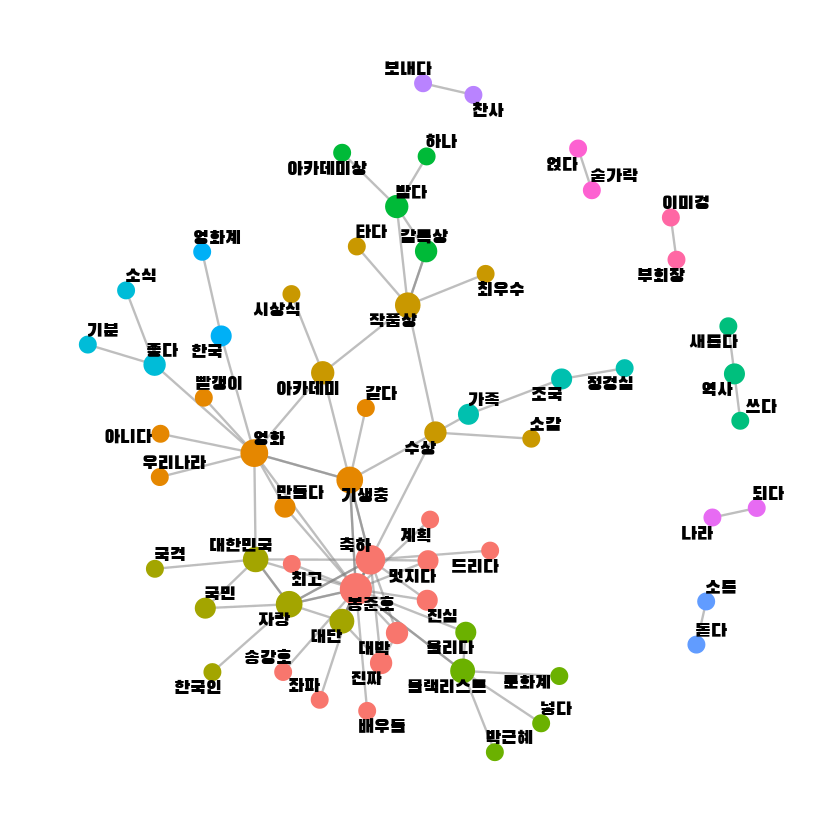

In [145]:
set.seed(1234)
ggraph(graph_bigram, layout = "fr") +         # 레이아웃
  
  geom_edge_link(color = "gray50",            # 엣지 색깔
                 alpha = 0.5) +               # 엣지 명암
    
  geom_node_point(aes(size = centrality,      # 노드 크기
                      color = group),         # 노드 색깔
                  show.legend = F) +          # 범례 삭제
  scale_size(range = c(4, 8)) +               # 노드 크기 범위
  
  geom_node_text(aes(label = name),           # 텍스트 표시
                 repel = T,                   # 노드밖 표시
                 size = 5,                    # 텍스트 크기
                 family = "blackhansans") +    # 폰트
  
  theme_graph()

### 파이 계수 vs 바이그램
####  파이 계수 
- 관련성이 큰 단어쌍 중심으로 네트워크 형성
- 빈도가 낮아도 관련성이 큰 단어가 주로 표현
- 관련성이 작은 노드들이 연결되지 않아서 단어 군집이 명확
- 단어들의 전반적 관게 파악X

#### 바이그램 
- 연이어 자주 사용된 단어쌍 중심으로 표현
- 관련성이 큰 동시에 자주 사용된 단어가 주로 표현
- 노드가 대부분 연결되기 때문에 군집은 덜 명확
- 단어들의 전반적인 관계 파악 

### 어떤 방법
#### 동시 출현 빈도 : 자주 사용된 단어 중심으로 단어들의 관계를 표현할 때
#### 파이 계수 : 단어가 얼마나 자주 사용되었는지 보다는 관려성이 큰 단어쌍이 무엇인지 관심이 있고, 단어 군집을 잘드러내고 싶을 때
#### n-gram : 연이어 사용될 때 의미를 지니는 단어쌍에 관심, 단어들이 전반적으로 어떤 관게를 형성하고 있는지 표현할 때

### Q1

In [146]:
raw_news_comment <- read_csv("news_comment_BTS.csv")
raw_news_comment %>% print

Rows: 1200 Columns: 5
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (4): reply, press, title, url
dttm (1): reg_time

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 1,200 x 5
   reg_time            reply                                   press title url  
   <dttm>              <chr>                                   <chr> <chr> <chr>
 1 2020-09-01 22:58:09 "국보소년단<U+0001F49C>"                한국~ [속~  http~
 2 2020-09-01 09:56:46 "아줌마가 들어도 좋더라"                한국~ [속~  http~
 3 2020-09-01 09:08:06 "팩트체크\n\n현재 빌보드 HOT 100\n\n1~  한국~ [속~  http~
 4 2020-09-01 08:52:32 "방탄소년단이 한국사람이라 너무 자랑스~ 한국~ [속~  http~
 5 2020-09-01 08:36:33 "대단한 BTS, 월드 클래스는 다르네^^ 좋~ 한국~ [속~  http~
 6 2020-09-01 08:34:14 "정국오빠 생일과 더불어 빌보드 1위기사~ 한국~ [속~  http~
 7 2020-09-01 08:32:14 "정말 축하하고 응원하지만\n집에서 여러~ 한국~ [속~  http~
 8 2020-09-01 08:22:09 "기자는 자고 일어났지만, 팬들은 못자고~ 한국~ [속~  http~
 9 2020-09-01 08:17:58 "자랑스럽다!!!!!! 축하합니다!!!!"       한국~ [속~  http~
10 2020-09-01 08:15:37 "SuperM 늘 응원하고 사랑합니다~"        한국~ [속~  http~
# ... with 1,190 more rows


In [172]:
library(textclean)
news_comment <- raw_news_comment %>%
  select(reply) %>%
  mutate(id = row_number(),
         reply = str_replace_all(reply, "[^가-힣]", " "),
         reply = str_squish(reply))

news_comment %>%
  select(id, reply) %>% print

# A tibble: 1,200 x 2
      id reply                                                                  
   <int> <chr>                                                                  
 1     1 국보소년단                                                             
 2     2 아줌마가 들어도 좋더라                                                 
 3     3 팩트체크 현재 빌보드 위 방탄소년단 위 위 위 위 위 위 위 위 위          
 4     4 방탄소년단이 한국사람이라 너무 자랑스러워요 우리오래오래 함께하자      
 5     5 대단한 월드 클래스는 다르네 좋은 소식 응원해요                         
 6     6 정국오빠 생일과 더불어 빌보드 위기사라니 축제구나                      
 7     7 정말 축하하고 응원하지만 집에서 여러 계정으로 스트리밍 돌리고 사재기하~
 8     8 기자는 자고 일어났지만 팬들은 못자고 발표 기다림                       
 9     9 자랑스럽다 축하합니다                                                  
10    10 늘 응원하고 사랑합니다                                                 
# ... with 1,190 more rows


### Q2

In [173]:
library(tidytext)
library(KoNLP)

In [174]:
comment_pos <- news_comment %>%
  unnest_tokens(input = reply,
                output = word,
                token = SimplePos22,
                drop = F)

comment <- comment_pos %>%
  separate_rows(word, sep = "[+]") %>%
  filter(str_detect(word, "/n|/pv|/pa")) %>%
  mutate(word = ifelse(str_detect(word, "/pv|/pa"),
                       str_replace(word, "/.*$", "다"),
                       str_remove(word, "/.*$"))) %>%
  filter(str_count(word) >= 2) %>%
  arrange(id)

comment %>% select(word, reply) %>% print

# A tibble: 7,539 x 2
   word       reply                                                            
   <chr>      <chr>                                                            
 1 국보소년   국보소년단                                                       
 2 아줌마     아줌마가 들어도 좋더라                                           
 3 들다       아줌마가 들어도 좋더라                                           
 4 좋다       아줌마가 들어도 좋더라                                           
 5 팩트체크   팩트체크 현재 빌보드 위 방탄소년단 위 위 위 위 위 위 위 위 위    
 6 빌보드     팩트체크 현재 빌보드 위 방탄소년단 위 위 위 위 위 위 위 위 위    
 7 방탄소년단 팩트체크 현재 빌보드 위 방탄소년단 위 위 위 위 위 위 위 위 위    
 8 방탄소년단 방탄소년단이 한국사람이라 너무 자랑스러워요 우리오래오래 함께하자
 9 한국사람   방탄소년단이 한국사람이라 너무 자랑스러워요 우리오래오래 함께하자
10 자랑       방탄소년단이 한국사람이라 너무 자랑스러워요 우리오래오래 함께하자
# ... with 7,529 more rows


### Q3

In [175]:
comment <- comment %>%
  mutate(word = case_when(str_detect(word, "축하") ~ "축하",
                          str_detect(word, "방탄") ~ "자랑",
                          str_detect(word, "대단") ~ "대단",
                          str_detect(word, "자랑") ~ "자랑",
                          T ~ word))

In [176]:
line_comment <- comment %>%
  group_by(id) %>%
  summarise(sentence = paste(word, collapse = " "))

line_comment %>% print

# A tibble: 1,155 x 2
      id sentence                                                             
   <int> <chr>                                                                
 1     1 국보소년                                                             
 2     2 아줌마 들다 좋다                                                     
 3     3 팩트체크 빌보드 자랑                                                 
 4     4 자랑 한국사람 자랑 우리오래오래 함께하다                             
 5     5 대단 월드 클래스 다르다 좋다 소식 응원해                             
 6     6 정국오빠 생일 더불다 빌보드 위기사 축제구                            
 7     7 축하 응원하지 계정 스트리밍 돌리다 사재기 팬덤 테러하 개념보고 놀라다
 8     8 기자 자다 일어나다 패다 못자 발표                                    
 9     9 자랑 축하                                                            
10    10 응원 사랑합                                                          
# ... with 1,145 more rows


### Q4

In [177]:
bigram_comment <- line_comment %>%
  unnest_tokens(input = sentence,
                output = bigram,
                token = "ngrams",
                n = 2)

bigram_seprated <- bigram_comment %>%
  separate(bigram, c("word1", "word2"), sep = " ")

bigram_seprated %>% print

# A tibble: 6,541 x 3
      id word1        word2       
   <int> <chr>        <chr>       
 1     1 NA           NA          
 2     2 아줌마       들다        
 3     2 들다         좋다        
 4     3 팩트체크     빌보드      
 5     3 빌보드       자랑        
 6     4 자랑         한국사람    
 7     4 한국사람     자랑        
 8     4 자랑         우리오래오래
 9     4 우리오래오래 함께하다    
10     5 대단         월드        
# ... with 6,531 more rows


### Q5

In [178]:
pair_bigram <- bigram_seprated %>%
  count(word1, word2, sort = T) %>%
  na.omit()

pair_bigram %>% print

# A tibble: 5,455 x 3
   word1  word2     n
   <chr>  <chr> <int>
 1 축하   하다     43
 2 자랑   축하     40
 3 자랑   자랑     38
 4 축하   자랑     35
 5 대단   자랑     24
 6 진짜   자랑     24
 7 진짜   대단     23
 8 자랑   진짜     17
 9 빌보드 축하     14
10 군대   면제     13
# ... with 5,445 more rows


In [182]:
library(tidygraph)
graph_bigram <- pair_bigram %>%
  filter(n >= 3) %>%
  as_tbl_graph(directed = F) %>%
  mutate(centrality = centrality_degree(),        # 연결 중심성
         group = as.factor(group_infomap()))      # 커뮤니티

graph_bigram %>% print

# A tbl_graph: 90 nodes and 130 edges
#
# An undirected multigraph with 6 components
#
# Node Data: 90 x 3 (active)
  name   centrality group
  <chr>       <dbl> <fct>
1 축하           18 4    
2 자랑           45 1    
3 대단            9 1    
4 진짜           12 4    
5 빌보드         16 2    
6 군대            3 15   
# ... with 84 more rows
#
# Edge Data: 130 x 3
   from    to     n
  <int> <int> <int>
1     1    61    43
2     1     2    40
3     2     2    38
# ... with 127 more rows


### Q5

Warning message:
"ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


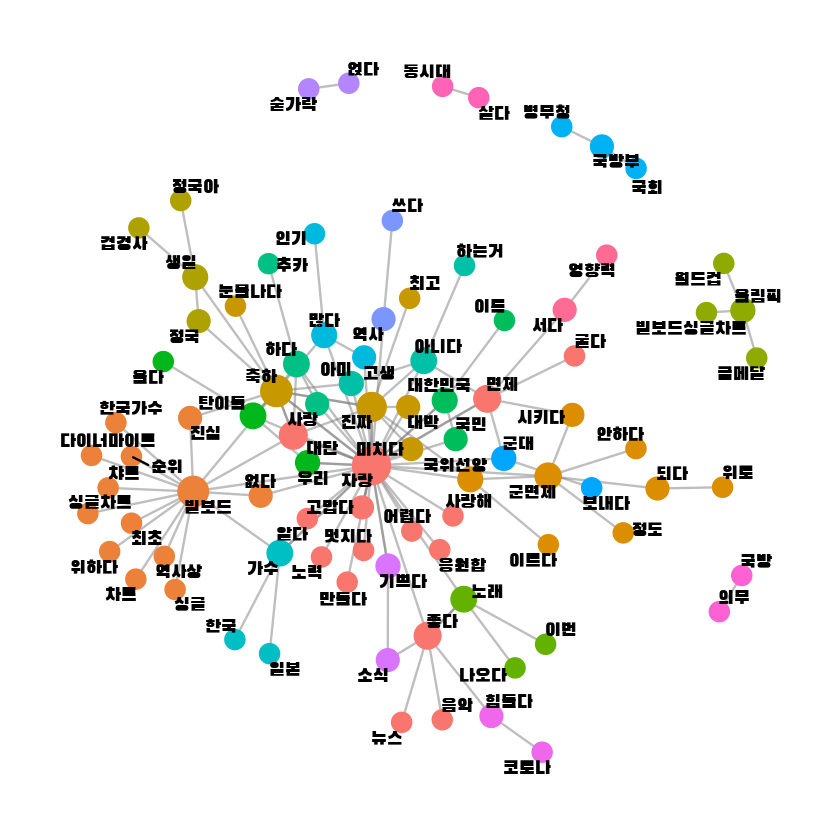

In [187]:
library(ggraph)
set.seed(1234)
ggraph(graph_bigram, layout = "fr") +      # 레이아웃
  
  geom_edge_link(color = "gray50",          # 엣지 색깔
                 alpha = 0.5) +             # 엣지 명암
  
  geom_node_point(aes(size = centrality,    # 노드 크기
                      color = group),       # 노드 색깔
                  show.legend = F) +        # 범례 삭제

  scale_size(range = c(4, 8)) +            # 노드 크기 범위
  
  geom_node_text(aes(label = name),         # 텍스트 표시
                 repel = T,                 # 노드밖 표시
                 size = 5,                  # 텍스트 크기
                 family = "blackhansans") +  # 폰트
  theme_graph()